In [121]:
from FBSsolver import *

# Всякие картинки и цифры


Считаю отклонение результата конечно-разностного метода от аналитического решения при разных $r, \sigma$. Ставить $\alpha = 1$ нельзя, см. ниже.


In [ ]:
alpha = 0.999
S_max = 1000
T_max = 1
K = 500
M = 400
N = 400

r = np.arange(0, 0.101, 0.02)
sgm = np.arange(0, 1.01, 0.2)

headers = ["r\\sgm"] + [f"{x:.2f}" for x in sgm]

table = []
for a in r:
    row = [f"{a:.2f}"]
    for b in sgm:
        U, t, S = FBSsolverFDM(S_max, K, T_max, a, b, alpha, M, N, False)
        V = np.zeros_like(U)
        for i in range(t.shape[0]):
            V[i] = AnalyticBlackScholes(S, K, t[i], a, b, False)
        W = np.absolute(U-V)
        max_error = np.max(W)
        row.append(f"{max_error:.4f}")
    table.append(row)

print(tabulate(table, headers=headers, tablefmt="grid", stralign="center"))

/content/FBSsolver.py:97: RuntimeWarning: invalid value encountered in divide
  d_1 = (np.log(S0 / K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * T ** 0.5)
/content/FBSsolver.py:98: RuntimeWarning: invalid value encountered in divide
  d_2 = (np.log(S0 / K) + (r - 0.5 * (sigma ** 2)) * T) / (sigma * T ** 0.5)


+---------+----------+--------+--------+--------+--------+--------+
|   r\sgm |     0.00 |   0.20 |   0.40 |   0.60 |   0.80 |   1.00 |
+=========+==========+========+========+========+========+========+
|    0    | nan      | 0.323  | 0.4982 | 0.7029 | 0.9162 | 1.1331 |
+---------+----------+--------+--------+--------+--------+--------+
|    0.02 |   0.7758 | 0.3231 | 0.4983 | 0.703  | 0.9163 | 1.1332 |
+---------+----------+--------+--------+--------+--------+--------+
|    0.04 |   0.9462 | 0.3232 | 0.4983 | 0.7031 | 0.9164 | 1.1334 |
+---------+----------+--------+--------+--------+--------+--------+
|    0.06 |   1.1461 | 0.3232 | 0.4984 | 0.7032 | 0.9166 | 1.1335 |
+---------+----------+--------+--------+--------+--------+--------+
|    0.08 |   1.3063 | 0.3232 | 0.4985 | 0.7033 | 0.9167 | 1.1336 |
+---------+----------+--------+--------+--------+--------+--------+
|    0.1  |   1.4583 | 0.3232 | 0.4986 | 0.7034 | 0.9168 | 1.1338 |
+---------+----------+--------+--------+--------

Все то же самое, но $\alpha = 1$. Получаются совершенно неверные значения. Это ожидаемо, L-1 приближение при таком альфа вырождается в нечто бессмысленное.


In [ ]:
alpha = 1
S_max = 1000
T = 1
K = 500
M = 800
N = 800

r = np.arange(0, 0.101, 0.02)
sgm = np.arange(0, 1.01, 0.2)

headers = ["r\\sgm"] + [f"{x:.2f}" for x in sgm]

table = []
for a in r:
    row = [f"{a:.2f}"]
    for b in sgm:
        U, t, S = FBSsolverFDM(S_max, K, T_max, a, b, alpha, M, N, False)
        V = np.zeros_like(U)
        for i in range(t.shape[0]):
            V[i] = AnalyticBlackScholes(S, K, t[i], a, b, False)
        W = np.absolute(U-V)
        max_error = np.max(W)
        row.append(f"{max_error:.4f}")
    table.append(row)

print(tabulate(table, headers=headers, tablefmt="grid", stralign="center"))

/tmp/ipython-input-99-710771016.py:35: RuntimeWarning: invalid value encountered in divide
  d_1 = (np.log(S0 / K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * T ** 0.5)
/tmp/ipython-input-99-710771016.py:36: RuntimeWarning: invalid value encountered in divide
  d_2 = (np.log(S0 / K) + (r - 0.5 * (sigma ** 2)) * T) / (sigma * T ** 0.5)


+---------+----------+--------+--------+--------+--------+--------+
|   r\sgm |     0.00 |   0.20 |   0.40 |   0.60 |   0.80 |   1.00 |
+=========+==========+========+========+========+========+========+
|    0    | nan      | 0.1978 | 0.3403 | 0.4944 | 0.6517 | 0.8103 |
+---------+----------+--------+--------+--------+--------+--------+
|    0.02 |   0.4673 | 0.1978 | 0.3403 | 0.4944 | 0.6517 | 0.8103 |
+---------+----------+--------+--------+--------+--------+--------+
|    0.04 |   0.6286 | 0.1978 | 0.3403 | 0.4944 | 0.6517 | 0.8103 |
+---------+----------+--------+--------+--------+--------+--------+
|    0.06 |   0.7472 | 0.1978 | 0.3403 | 0.4944 | 0.6518 | 0.8104 |
+---------+----------+--------+--------+--------+--------+--------+
|    0.08 |   0.841  | 0.1978 | 0.3403 | 0.4945 | 0.6518 | 0.8104 |
+---------+----------+--------+--------+--------+--------+--------+
|    0.1  |   0.9385 | 0.1978 | 0.3403 | 0.4945 | 0.6518 | 0.8104 |
+---------+----------+--------+--------+--------

Неочевидно, но факт: при условии $r \neq 0$ ошибка концентрируется около точки $t=0, S=K$. Это странно, т.к. по идее около границы все наоборот должно быть супергуд, потому что сильно влияние граничных условий, но почему-то так происходит. Причина мне непонятна.


/tmp/ipython-input-99-710771016.py:35: RuntimeWarning: invalid value encountered in divide
  d_1 = (np.log(S0 / K) + (r + 0.5 * (sigma ** 2)) * T) / (sigma * T ** 0.5)
/tmp/ipython-input-99-710771016.py:36: RuntimeWarning: invalid value encountered in divide
  d_2 = (np.log(S0 / K) + (r - 0.5 * (sigma ** 2)) * T) / (sigma * T ** 0.5)


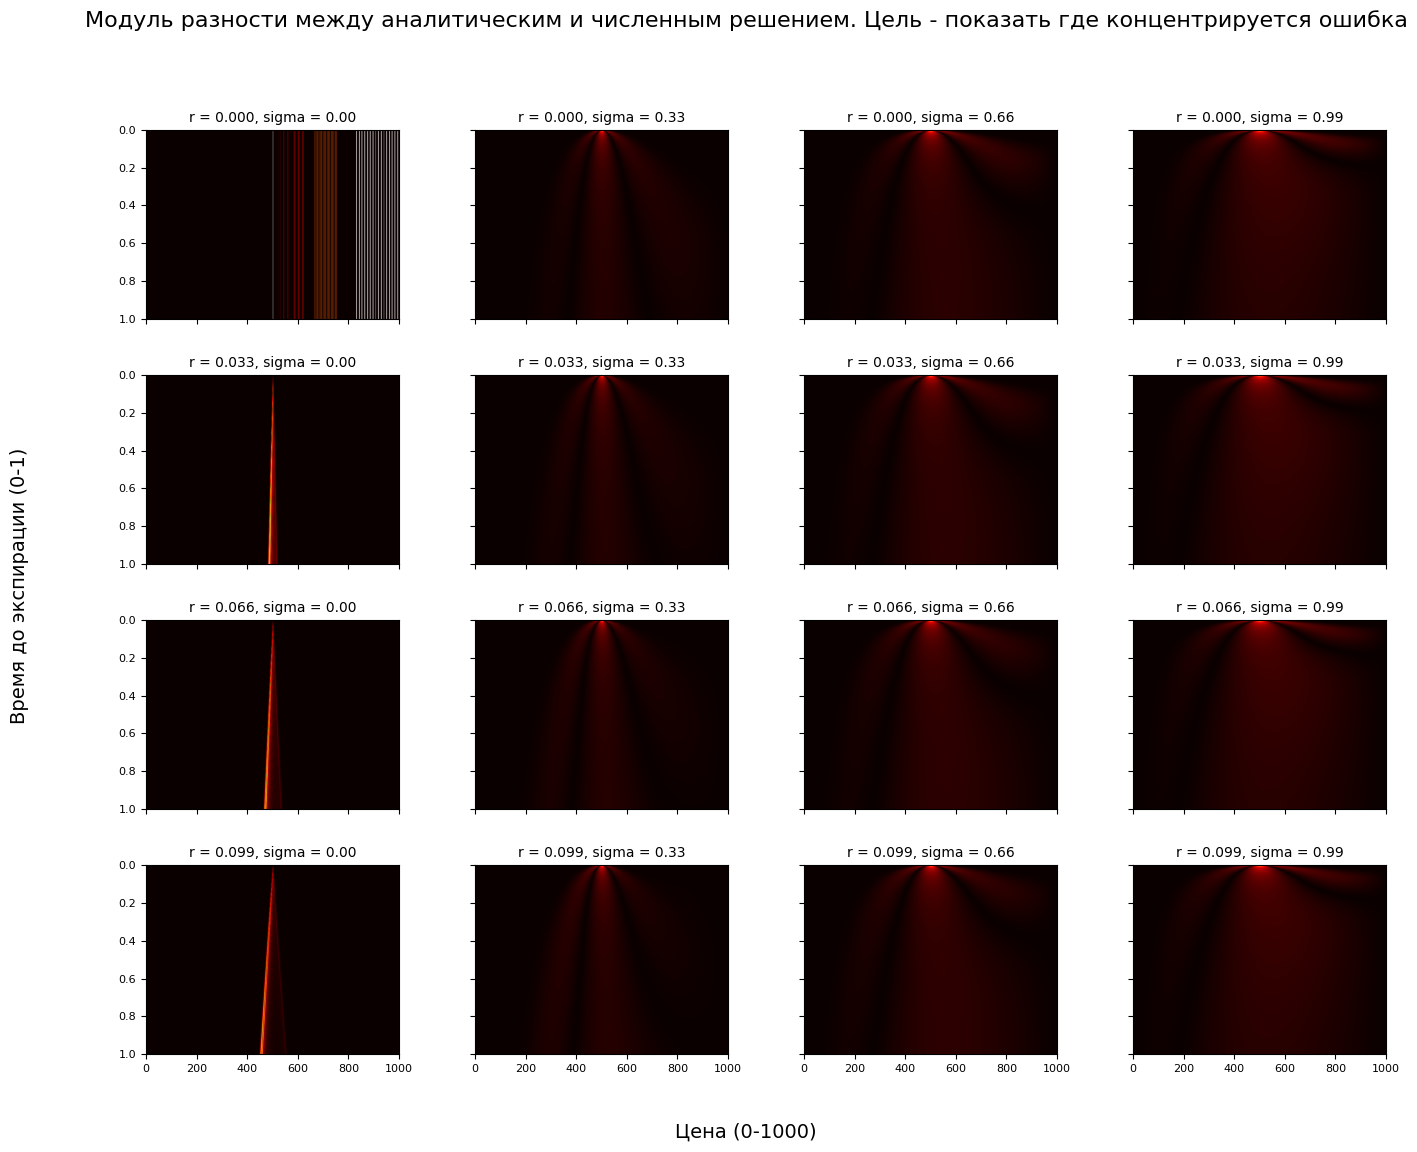

In [ ]:
alpha = 0.9999
S_max = 1000
T = 1
K = 500
M = 800
N = 800

A_vals = np.round([0.033 * i for i in range(4)], 3)
B_vals = np.round([0.33 * i for i in range(4)], 2)

fig, axs = plt.subplots(4, 4, figsize=(16, 12), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.3, hspace=0.3)

for i, a in enumerate(A_vals):
    for j, b in enumerate(B_vals):
        ax = axs[i, j]

        U, t, S = FBSsolverFDM(S_max, K, T, a, b, alpha, M, N)
        V = np.zeros_like(U)
        for k in range(t.shape[0]):
            V[k] = AnalyticBlackScholes(S, K, t[k], a, b)
        matrix = np.absolute(U-V)

        im = ax.imshow(matrix,
                       extent=[0, 1000, 1, 0],
                       origin='upper',
                       aspect='auto',
                       cmap='hot')

        ax.set_title(f'r = {a:.3f}, sigma = {b:.2f}', fontsize=10)
        ax.tick_params(axis='both', which='major', labelsize=8)

fig.text(0.5, 0.04, 'Цена (0-1000)', ha='center', fontsize=14)
fig.text(0.04, 0.5, 'Время до экспирации (0-1)',
         va='center', rotation='vertical', fontsize=14)

plt.suptitle("Модуль разности между аналитическим и численным решением. Цель - показать где концентрируется ошибка", fontsize=16)
plt.show()

Посмотрим как ведет себя отклонение отклонение приближенных решений от аналитического при уменьшении шага сетки. Нам обещали сходимость порядка $O(\Delta S^2 + \Delta t^{2-\alpha})$, я здесь делаю по-тупому, и уменьшаю каждый раз шаг сетки и по S и по t в 2 раза, а $\alpha = 1$, так что должен получить сходимость порядка $O(\Delta t)$.


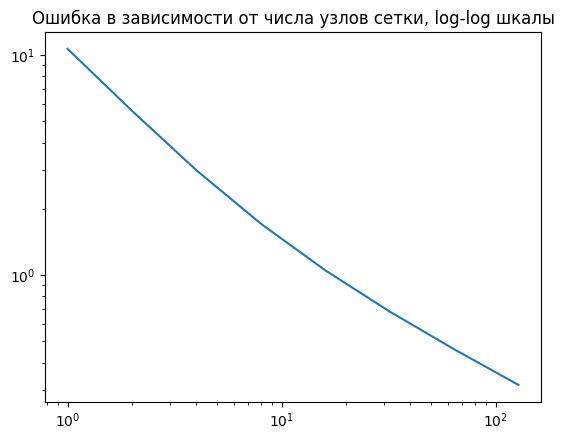

In [ ]:
alpha = 0.999
S_max = 1000
T = 1
K = 500
r = 0.1
sigma = 0.5

M_0 = 10
N_0 = 10

number_of_multipliers = 8

grid = np.power(2 * np.ones(number_of_multipliers),
                np.arange(0, number_of_multipliers))
all_errors = np.zeros(number_of_multipliers)

for i in range(number_of_multipliers):
    U, t, S = FBSsolverFDM(S_max, K, T, r, sigma, alpha,
                           M_0*int(grid[i]), N_0*int(grid[i]), call=False)
    V = np.zeros_like(U)
    for k in range(t.shape[0]):
        V[k] = AnalyticBlackScholes(S, K, t[k], r, sigma, call=False)
    W = np.absolute(U-V)
    all_errors[i] = np.max(W)

fig1, ax1 = plt.subplots()

ax1.set_yscale('log')
ax1.set_xscale('log')

ax1.set_title("Ошибка в зависимости от числа узлов сетки, log-log шкалы")

ax1.plot(grid, all_errors)

Посмотрим еще время работы.


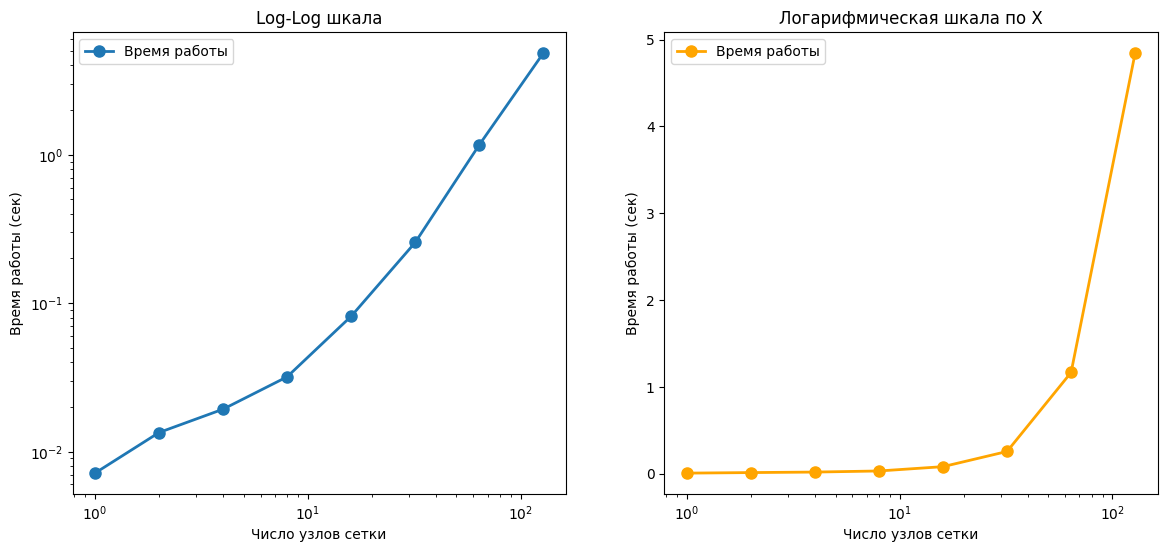

In [ ]:
alpha = 0.999
S_max = 1000
T = 1
K = 500
r = 0.1
sigma = 0.5

M_0 = 10
N_0 = 10

number_of_multipliers = 8

n = np.arange(0, number_of_multipliers)
sizes = np.power(2 * np.ones(number_of_multipliers),
                 np.arange(0, number_of_multipliers))
times = np.zeros(number_of_multipliers)
for i in range(number_of_multipliers):
    t1 = time()
    U, t, S = FBSsolverFDM(S_max, K, T, r, sigma, alpha,
                           M_0*int(sizes[i]), N_0*int(sizes[i]), call=False)
    t2 = time()
    times[i] = t2 - t1

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

ax1.loglog(sizes, times, 'o-', linewidth=2, markersize=8, label='Время работы')
ax1.set_title('Log-Log шкала')
ax1.set_xlabel('Число узлов сетки')
ax1.set_ylabel('Время работы (сек)')
ax1.legend()

ax2.semilogx(sizes, times, 'o-', color='orange',
             linewidth=2, markersize=8, label='Время работы')
ax2.set_title('Логарифмическая шкала по X')
ax2.set_xlabel('Число узлов сетки')
ax2.set_ylabel('Время работы (сек)')
ax2.legend()

plt.show()

Ну и посмотрим, как меняется решение при изменении альфа, меняется ли хоть что-то, и делает ли оно это непрерывно.


alpha = 0.9999


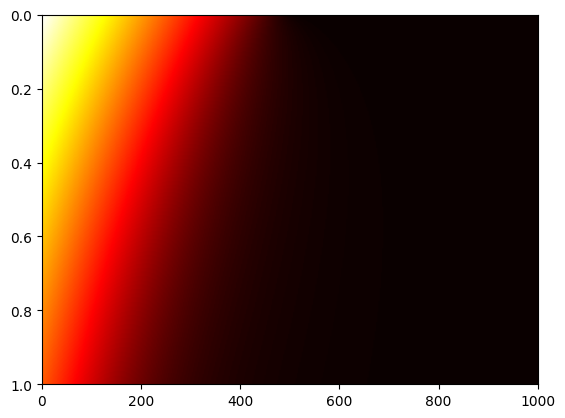

alpha = 0.8888


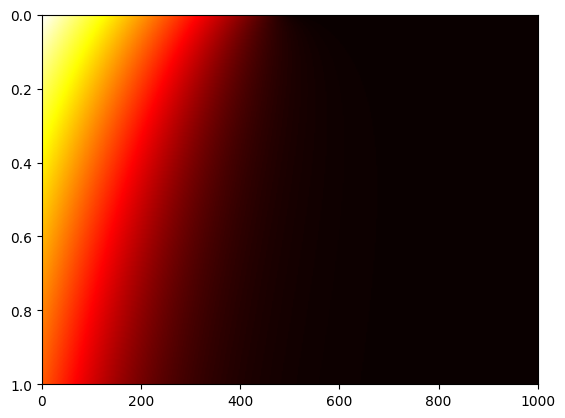

alpha = 0.7777000000000001


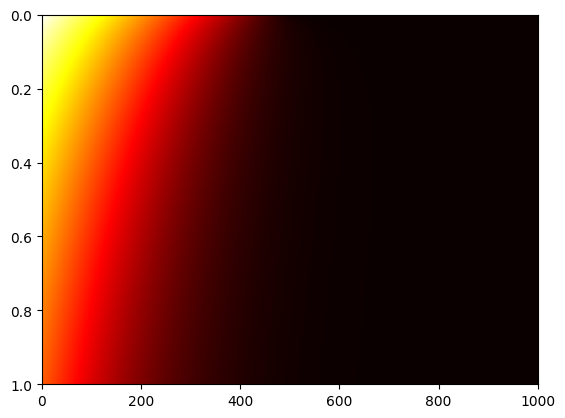

alpha = 0.6666000000000001


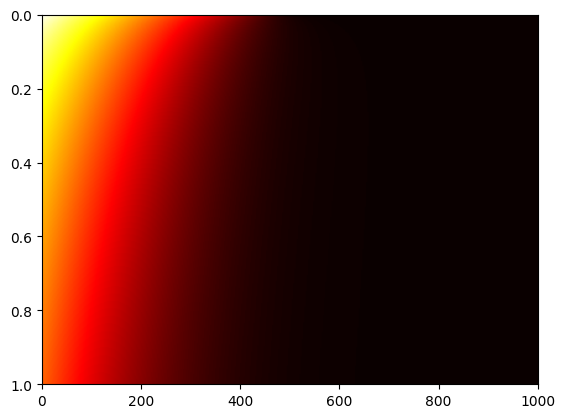

alpha = 0.5555


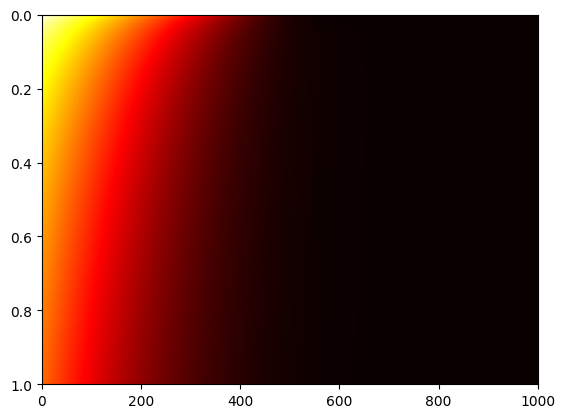

alpha = 0.4444


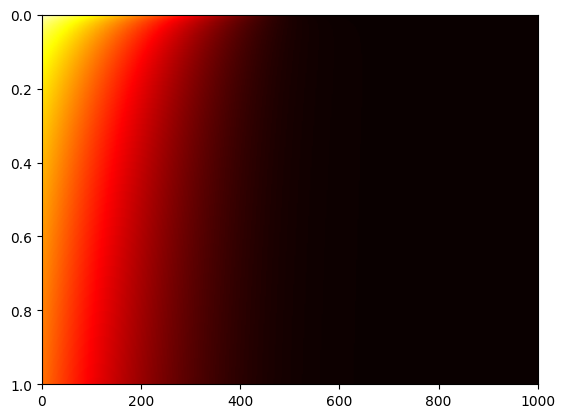

alpha = 0.33330000000000004


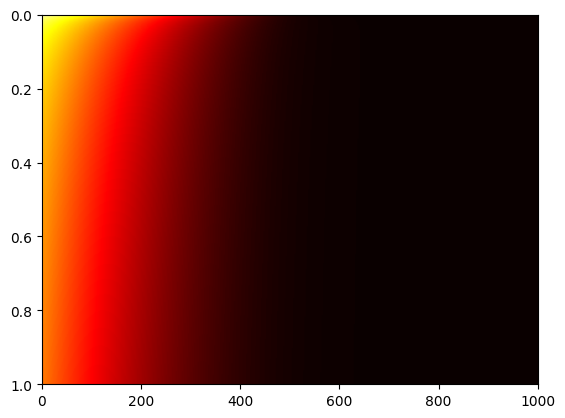

alpha = 0.2222


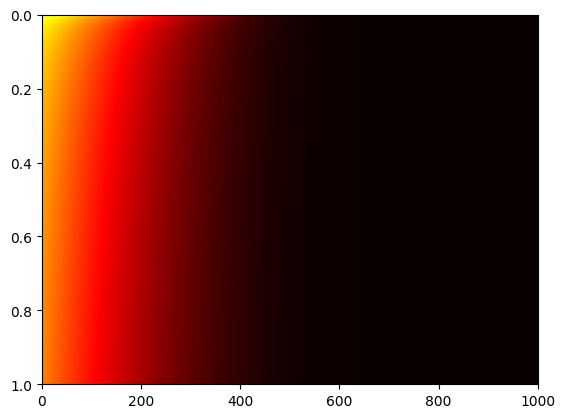

alpha = 0.1111


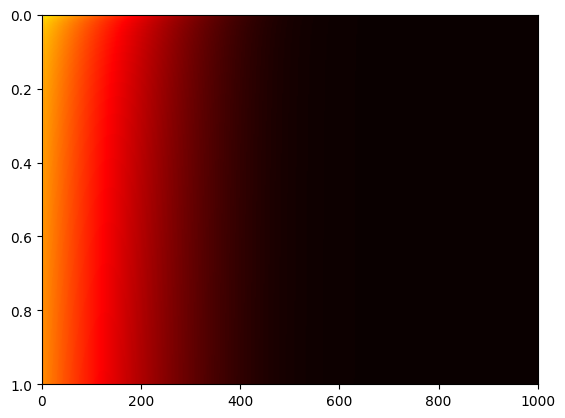

alpha = 0.0


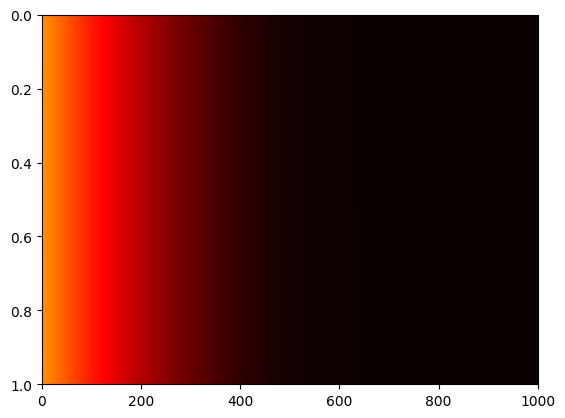

alpha = 1


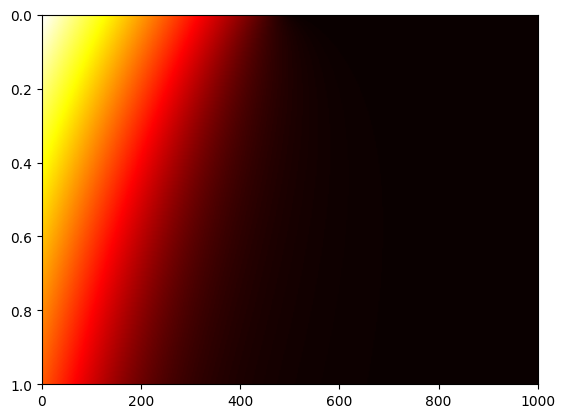

In [ ]:
def compute_matrix(alpha):
    S_max = 1000
    T = 1
    K = 500
    r = 0.7
    sigma = 0.5
    U, t, S = FBSsolverFDM(S_max, K, T, r, sigma, alpha, 400, 400, call=False)
    return U


A = np.linspace(0, 1 - 1e-4, 10)
A = np.flip(A)
for alpha in A:
    U = compute_matrix(alpha)
    print(f"alpha = {alpha}")
    plt.imshow(U, extent=[0, 1000, 1, 0],
               origin='upper',
               aspect='auto',
               cmap='hot')
    plt.show()

U = compute_matrix(1)
print("alpha = 1")
plt.imshow(U, extent=[0, 1000, 1, 0],
           origin='upper',
           aspect='auto',
           cmap='hot')

plt.show()